


This article explores techniques that can be used to assess how well a model fits a dataset. 
Specifically, we'll demonstrate how to produce the following visualizations:  


- Q-Q Plot: Compares two probability distributions by plotting their quantiles against each other.    
- P-P Plot: Compares two cumulative distribution functions against each other.            
- Histogram: Plot density histogram with parametric distribution overlay.   

 
In addition, the following tests will be introduced:   

- Kolmogorov-Smirnov: Test the equality of continuous, one-dimensional probability distributions.    
- Anderson-Darling: Test whether a given sample is drawn from a given probability distribution.    
- Shapiro-Wilk: Test the null hypothesis that the data is drawn from a normal distribution.   


The same dataset will be used throughout the post, provided below:

In [2]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

np.set_printoptions(suppress=True, precision=8)

dat = np.asarray([
    62.55976, -14.71019, -20.67025, -35.43758, -10.65457,  21.55292, 
    41.26359,   0.33537, -14.43599, -40.66612,   6.45701, -40.39694, 
     55.1221,  24.50901,   6.61822, -29.10305,   6.21494,  15.25862,  
    13.54446,   2.48212,  -2.34573, -21.47846,   -5.0777,  26.48881, 
    -8.68764,  -5.49631,  42.58039,  -6.59111, -23.08169,  19.09755, 
   -21.35046,   0.24064,  -3.16365, -37.43091,  24.48556,    2.6263,  
    31.14471,   5.75287,  -46.8529, -14.26814,   8.41045,  18.11071, 
   -30.46438,  12.22195, -31.83203,  -8.09629,  52.06456, -24.30986, 
   -25.62359,   2.86882,  15.77073,  31.17838, -22.04998
    ])


The task is to assess how well our data fits a normal distribution parameterized 
with mean and variance computed using:

$$
\begin{align*} 
\bar{x} &= \frac{1}{n}\sum_{i=1}^{n} x_{i} \\
s^{2} &= \frac{1}{n-1}\sum_{i=1}^{n} (x_{i} - \bar{x})^2
\end{align*}
$$

Keep in mind that although we're testing how well othe data can be approximated 
by a normal distribution, many of the tests we highlight (with the exception of 
Shapiro-Wilk) can assess the quality of fit for many different parametric models.      

We begin with visual assessments of goodness-of-fit.         


### Q-Q Plot

The Q-Q plot compares two probability distributions by plotting their quantiles 
against each other. We compare standard normal quantiles (x-axis) against the 
empirical quantiles from the dataset of interest (y-axis). If the two 
distributions are similar, the points in the Q-Q plot will approximately lie on 
a straight line. There isn't a hard and fast rule to determine how much 
deviation from the straight line is too much, but if the distributions are very 
different, it will be readily apparent in the Q-Q plot. We can construct a 
Q-Q plot from scratch using matplotlib as follows:       

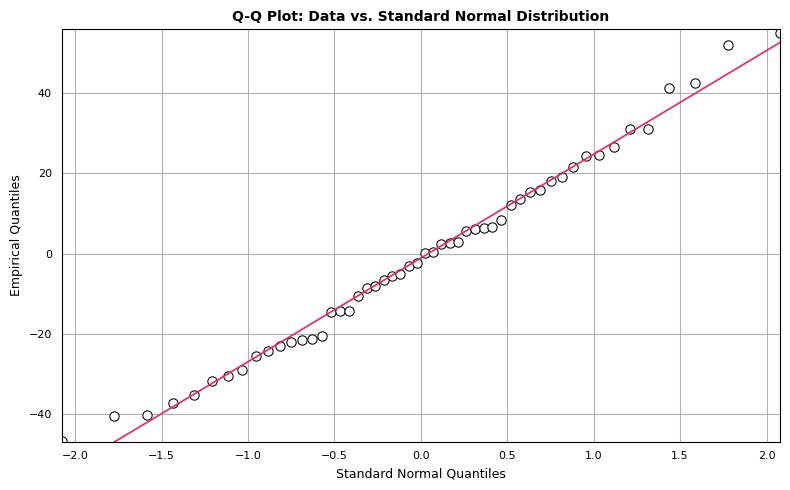

In [3]:
"""
Generate qq-plot comparing data against standard normal distribution.
"""

line_color = "#E02C70"
dat = np.sort(dat)
cdf = np.arange(1, dat.size + 1) / dat.size
ndist = stats.norm(loc=0, scale=1)
theo = ndist.ppf(cdf)


# Remove observations containing Inf.
x, y = zip(*[tt for tt in zip(theo, dat) if np.Inf not in tt and -np.Inf not in tt])

# Obtain coefficients for best fit regression line.
b1, b0, _, _, _ = stats.linregress(x, y)
yhat = [b1 * ii + b0 for ii in x]

# Determine upper and lower axis bounds.
xmin, xmax = min(x), max(x)
ymin, ymax = int(min(y) - 1), int(max(y) + 1)

fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
ax.set_title(
    "Q-Q Plot: Data vs. Standard Normal Distribution",
    color="#000000", loc="center", fontsize=10, weight="bold"
    )
ax.scatter(x, y, color="#FFFFFF", edgecolor="#000000", linewidth=.75, s=45)
ax.plot(x, yhat, color=line_color, linewidth=1.25)
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)
ax.set_ylabel("Empirical Quantiles", fontsize=9, color="#000000")
ax.set_xlabel("Standard Normal Quantiles", fontsize=9, color="#000000")
ax.tick_params(axis="x", which="major", labelsize=8)
ax.tick_params(axis="y", which="major", labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)   
ax.set_axisbelow(True) 
plt.show()




The points seem to mostly follow a straight line, but there are observations 
that deviate from strict linearity. However, there's nothing here that disqualifies 
our dataset from being modeled with normal distribution.        



### P-P Plot

The P-P plot compares two cumulative distribution functions against each other. 
To produce a P-P plot, we plot the theoretical percentiles (x-axis) against 
empirical percentiles (y-axis), so that each axis ranges from 0-1. The line of
comparison is the 45 degree line running from (0,0) to (1,1). The distributions 
are equal if and only if the plot falls on this line: any deviation indicates a 
difference between the distributions. The code to generate a P-P plot is 
provided below:    


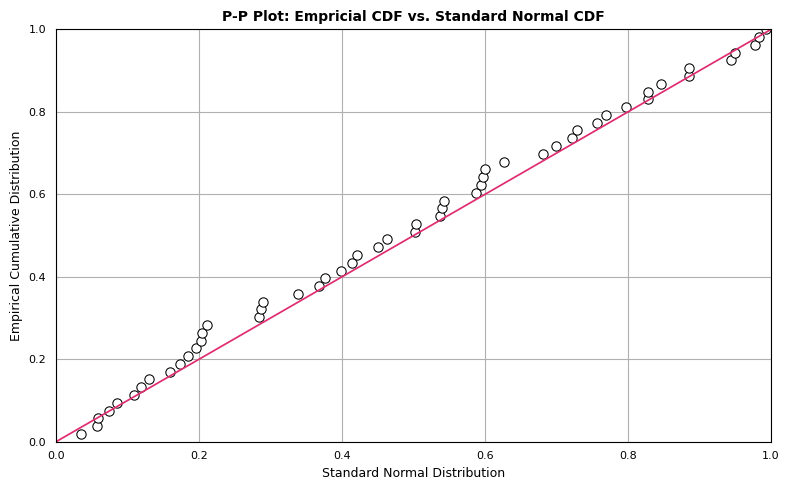

In [4]:
"""
Create P-P plot, which compares theoretical normal percentiles (x-axis) against 
empirical percentiles (y-axis).
"""
dat = np.sort(dat)
dat_mean = dat.mean()
dat_std = dat.std(ddof=1)

# Standardize dat.
sdat = (dat - dat_mean) / dat_std
cdf = np.arange(1, dat.size + 1) / dat.size
ndist = stats.norm(loc=0, scale=1)
theo = ndist.cdf(sdat)
x, y = theo, cdf

fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
ax.set_title(
    "P-P Plot: Empricial CDF vs. Standard Normal CDF",
    color="#000000", loc="center", fontsize=10, weight="bold"
    )

ax.scatter(x, y, color="#FFFFFF", edgecolor="#000000", linewidth=.75, s=45)
ax.plot([0, 1], [0, 1], color=line_color, linewidth=1.25)
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)
ax.set_ylabel("Empirical Cumulative Distribution", fontsize=9,color="#000000")
ax.set_xlabel("Standard Normal Distribution", fontsize=9, color="#000000")
ax.tick_params(axis="x", which="major", labelsize=8)
ax.tick_params(axis="y", which="major", labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)   
ax.set_axisbelow(True) 
plt.show()


      
Although the observations follow the linear trend in general, the data overall 
appear somewhat above the reference line $y=x$. This may be attributable
to the mean of `dat` being greater than 0. However, this doesn't
eliminate the possibility of our data representing a sample from a normal 
population. We expect some deviation from the expected normal percentiles, 
which we see in the P-P plot. 

### Histogram with Parametric Overlay     

For the next diagnostic we create a histogram which represents the density of 
the empirical data overlaid with a parameterized normal distribution.    


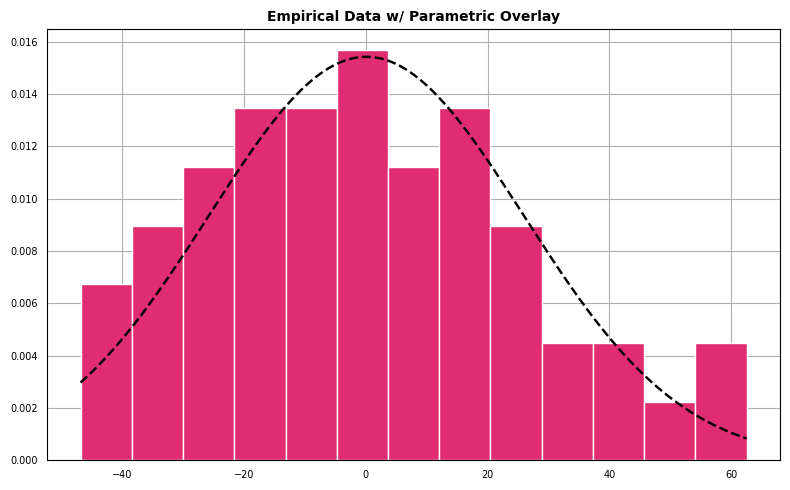

In [5]:
"""
Plot histogram with best-fit normal distribution overlay.
"""
dist = stats.norm(loc=dat_mean, scale=dat_std)
xdist = np.arange(dat.min(), dat.max(), .01)
ydist = dist.pdf(xdist)

fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
ax.set_title(
    "Empirical Data w/ Parametric Overlay", color="#000000",
    loc="center", fontsize=10, weight="bold"
    )
ax.hist(
    dat, 13, density=True, alpha=1, color="#E02C70", 
    edgecolor="#FFFFFF", linewidth=1.0
    )

ax.plot(xdist, ydist, color="#000000", linewidth=1.75, linestyle="--")
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="x", which="major", labelsize=7)
ax.tick_params(axis="y", which="major", labelsize=7)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)
ax.set_axisbelow(True)
plt.show()


The data appear to follow a pattern roughly the shape outlined by a best-fit normal density.    

### Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov Test is different than the previous set of
visualizations in that it produces a metric used to assess the level of 
agreement between target and reference distributions, but a visual
diagnostic can be obtained as well.     
 
Suppose that we have a set of empirical data that we assume originates from some 
distribution $F$. The Kolmogorov-Smirnov statistic is used to test:

> $H_{0}$ : the samples come from $F$      

against:   

> $H_{1}$ : The samples do not come from $F$     


The test compares the empirical distribution function of the data, $F_{obs}$, 
with the cumulative distribution function associated with the null hypothesis, 
$F_{exp}$ (the expected CDF).   

The Kolmogorov-Smirnov statistic is given by

$$
D_{n} = max|F_{exp}(x) - F_{obs}(x)|.
$$


Assuming the data are ordered such that $x_{1}$ represents the the minimum 
value in the dataset and $x_{n}$ the maximum value, the empirical CDF can be
represented as     

$$
F_{obs}(x_{i}) = \frac{i}{n},
$$

where $n$ is the number of observations in the dataset.  

For each observation, compute the absolute differences between $F_{exp}(x)$ and 
$F_{obs}(x)$. The Kolmogorov-Smirnov statistic $D_{n}$ is the maximum value 
from the vector of absolute differences. This value represents the maximum 
absolute distance between the expected and observed distribution functions. 
$D_{n}$ is then compared to a table of critical values to assess whether to 
reject or fail to reject $H_{0}$.     

Before computing the statistic, we first demonstrate how to generate the one-sample 
Kolmogorov-Smirnov comparison plot:      


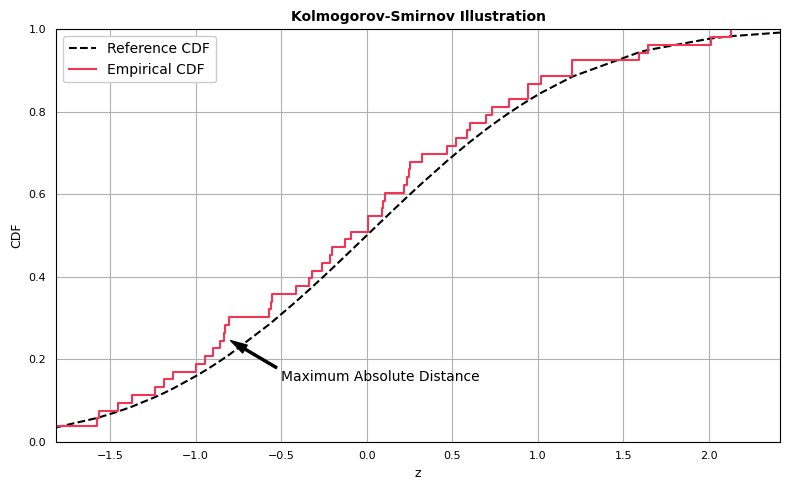

In [6]:
"""
Kolmogorov-Smirnov test visualization.
"""
dat = np.sort(dat)
dat_mean = dat.mean()
dat_std = dat.std(ddof=1)
sdat = (dat - dat_mean) / dat_std
cdf = np.arange(1, dat.size + 1) / dat.size
dist = stats.norm(loc=0, scale=1)

# Generate Kolmogorov-Smirnov comparison plot.
# y0 : Values from reference distribution.
# y1 : Values from empirical distribution.
ecdfpairs = zip(sdat, cdf)
ecdfpairs = [ii for ii in ecdfpairs if np.Inf not in ii and -np.Inf not in ii]
x, y1 = zip(*ecdfpairs)
x = np.asarray(x, dtype=float)
y0 = dist.cdf(x)
y1 = np.asarray(y1, dtype=float)

absdiffs = np.abs(y1 - y0)
indx = np.argwhere(absdiffs == absdiffs.max()).ravel()[0]
xann, y0ann, y1ann  = x[indx], y0[indx], y1[indx]
ypoint = (y1ann + y0ann) / 2
xy, xyp = (xann, ypoint), (xann + .3, ypoint - .1)

fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
xmin, xmax, ymin, ymax = min(x), max(x), 0, 1
ax.set_title(
    "Kolmogorov-Smirnov Illustration", fontsize=10,
    loc="center", color="#000000", weight="bold"
    )
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)
ax.plot(x, y0, color="#000000", linewidth=1.5, linestyle="--", label="Reference CDF")
ax.step(x, y1, color="#f33455", linewidth=1.5, where="pre", label="Empirical CDF")
ax.tick_params(axis="x", which="major", labelsize=8)
ax.tick_params(axis="y", which="major", labelsize=8)
ax.set_ylabel("CDF", fontsize=9)
ax.set_xlabel("z", fontsize=9)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)
ax.set_axisbelow(True)
plt.annotate(
    "Maximum Absolute Distance", xy=xy, xytext=xyp,
    arrowprops=dict(facecolor="black", width=1.5, shrink=0.025, headwidth=6.5)
    )
ax.legend(
    frameon=1, loc="upper left", fontsize="medium", fancybox=True, framealpha=1
    )
plt.show()


The Kolmogorov-Smirnov statistic is computed as the greatest absolute distance 
between the empirical and expected CDFs. Computing the statistic is straightforward:

In [7]:

dat = np.sort(dat)
cdf = np.arange(1, dat.size + 1) / dat.size
dat_mean = dat.mean()
dat_std = dat.std(ddof=1)

# Parameterized expected normal distribution.
expnorm = stats.norm(loc=dat_mean, scale=dat_std)
expcdf = expnorm.cdf(dat)

# Compute difference between datcdf and expcdf.
absdiffs = np.abs(cdf - expcdf)
D0 = absdiffs.max()

D0

0.07194182492411011

We can compare our value of $D$ with the value obtained from 
`scipy.stats.kstest`, which takes as arguments the empirical dataset and a 
callable representing the CDF of the expected distribution, and returns the 
D-statistic as well as the p-value associated with the computed D-statistic 
(note that critical values depend on the number of observations). The manually 
computed result is given by `D0`, the result returned from `scipy.stats.kstest` 
by `D1`:    

In [8]:

dat = np.sort(dat)
cdf = np.arange(1, dat.size + 1) / dat.size
dat_mean = dat.mean()
dat_std = dat.std(ddof=1)

# Parameterized expected normal distribution.
expnorm = stats.norm(loc=dat_mean, scale=dat_std)
expcdf  = expnorm.cdf(dat)
absdiffs = np.abs(cdf - expcdf)
D0 = absdiffs.max()
D1, p1 = stats.kstest(dat, expnorm.cdf)

print(f"Our D         : {D0:.8}")
print(f"Scipy kstest D: {D1:.8}")
print(f"kstest p-value: {p1:.8}")


Our D         : 0.071941825
Scipy kstest D: 0.071941825
kstest p-value: 0.92828027


The p-value (the second element of the 2-tuple returned by `scipy.stats.kstest`) 
is 0.9283. How should this result be interpreted?

For the one-sample Kolmogorov-Smirnov test, the null hypothesis is that the 
distributions are the same. Thus, the lower the p-value the greater the 
statistical evidence you have to reject the null hypothesis and conclude the 
distributions are different. *The test only lets you speak of your confidence 
that the distributions are different, not the same, since the test is designed 
to find the probability of Type I error*. Therefore, if $D$ is less than the 
critical value, we do not reject the null hypothesis (corresponds to a large 
p-value). If $D$ is greater than the critical value, we reject the null 
hypothesis (corresponds to a small p-value).

Given our p-value of 0.9326, we do not have sufficient evidence to reject the 
null hypothesis that the distributions are the same.



### The Anderson-Darling Test

The Anderson-Darling test tests the null hypothesis that a sample is drawn from a 
population that follows a particular distribution. It makes use of the fact that 
when given a hypothesized underlying distribution and assuming the data is a
sample from this distribution, the CDF of the data can be assumed to follow a 
uniform distribution. The statistic itself can be expressed as:

$$
\begin{align*} 
A^{2} &= -n - S, \hspace{2mm} \text{where} \\
S &= \sum_{i=1}^{n} \frac{2i-1}{n} \Big[Ln(F(y_{i})) + Ln(1 - F(y_{n+1-i})) \Big]
\end{align*}
$$


The function `scipy.stats.anderson` takes as arguments the empirical dataset 
and a distribution to test against (one of "norm", "expon", "logistic", 
"gumbel", "gumbel_l" or "gumbel_rexponential"), and returns the 
Anderson-Darling test statistic, the critical values for the specified 
distribution and the significance levels associated with the critical values. 
For example, to test whether our dataset follows a normal distribution, we run the 
following:

In [9]:

# Perform Anderson-Darling test.
A, crit, sig = stats.anderson(dat, dist="norm")

print(f"A   : {A}")
print(f"crit: {crit}")
print(f"sig : {sig}")


A   : 0.22442637404651578
crit: [0.54  0.615 0.738 0.861 1.024]
sig : [15.  10.   5.   2.5  1. ]


According to the [`scipy.stats.anderson` documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.anderson.html), 
if the returned statistic is larger than the critical values, then for the 
corresponding significance level the null hypothesis (that the data come from 
the chosen distribution) can be rejected. Since our statistic 
0.224426 is smaller than all critical values, we do not have sufficient 
evidence to reject the null hypothesis that the data come from a normal 
distribution.

A table of Anderson-Darling critical values can be found 
[here](https://gist.github.com/jtrive84/8e856c402236e9b16f5bf5c165c7df7d/raw/a36497e47dba1f4bbeef95416524aa1efd033d58/AndersonDarling.pdf).    





### Shapiro-Wilk Test

The Shapiro-Wilk test null hypothesis is that the sample is drawn from a 
normally distributed population. The function `scipy.stats.shapiro` takes the 
empirical dataset as it's sole argument, and similar to `scipy.stats.kstest` 
returns a 2-tuple containing the test statistic and p-value.    


In [10]:

# Perform Shapiro-Wilk test.
W, p = stats.shapiro(dat)

print(f"W: {W}")
print(f"p: {p}")


W: 0.9804516434669495
p: 0.5324737429618835


If the p-value is less than the chosen alpha level, then the null hypothesis is 
rejected, and there is evidence that the data tested are not normally 
distributed. If the p-value is greater than the chosen alpha level, then the 
null hypothesis that the data came from a normally distributed population can 
not be rejected (e.g., for an alpha level of 0.05, a data set with a p-value of 
0.05 rejects the null hypothesis that the data are from a normally distributed 
population). Our p-value is 0.532, so we cannot reject the null hypothesis.

A table of Shapiro-Wilk critical values can be downloaded 
[here](https://gist.github.com/jtrive84/8e856c402236e9b16f5bf5c165c7df7d/raw/c403acff7af1837c03d9f16d0300b291546b7a3d/ShapiroWilk.pdf).

